In [19]:
import pandas as pd

# Replace 'data.xlsx' with your Excel file's name and path if it's located in a different directory
file_path = 'data.xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)
column_to_remove = 'Unnamed: 0'
data.drop(column_to_remove, axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'], format='%b %Y')
data.set_index('Date', inplace=True)
data = data.pct_change().dropna()*100
data = data.reset_index()
data

# Replace 'data.xlsx' with your Excel file's name and path if it's located in a different directory
file_path = 'OutProcess.xlsx'

# Load the data from the Excel file
cpi = pd.read_excel(file_path)

cpi.head()

merged_df = pd.merge(data, cpi, on='Date', how='inner')
merged_df.set_index('Date', inplace=True)
merged_df.head()
# We keep the the most correlated variables
columns_to_keep = ['lag_Food', 'lag_Clothing/Shoes', 'Household/Furnishing/Equipment','lag_Household/Furnishing/Equipment','GDP','CPI','Unemployment','Wages',	'Balance of Payments',	'Consumption Spending',	
                   'Inventory Investment',	'Rate']

# Create a new DataFrame with only the desired columns
df_filtered = merged_df[columns_to_keep]
new_column_names = {
    'Balance of Payments': 'BOP',
    'Consumption Spending': 'CS',
    'Inventory Investment': 'II',
    'lag_Food' :'LFood',
    'lag_Clothing/Shoes': 'LClothShoes'	,
    'Household/Furnishing/Equipment':'HouseFurnEquip',
    'lag_Household/Furnishing/Equipment':'LHouseFurnEquip'
}

df_filtered.rename(columns=new_column_names, inplace=True)
df_filtered.index = df_filtered.index.strftime("%Y-%m")
df_filtered['CPI']=((1+df_filtered['CPI']/100)**12-1)*100
df_filtered
df_filtered = df_filtered.reset_index()
df_filtered

C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1413157204.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns=new_column_names, inplace=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1413157204.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CPI']=((1+df_filtered['CPI']/100)**12-1)*100


,Date,LFood,LClothShoes,HouseFurnEquip,LHouseFurnEquip,GDP,CPI,Unemployment,Wages,BOP,CS,II,Rate
0,2013-02,-0.455581,-0.760870,0.175593,0.264085,0.301749,14.763859,-0.356904,0.040568,1.058271,0.376877,-6.708165,0.238854
1,2013-03,0.915332,1.204819,0.262927,0.175593,0.347820,1.973621,3.275875,0.527170,1.047189,0.375462,-7.190517,-0.069500
2,2013-04,0.000000,0.541126,-0.174825,0.262927,0.177960,-1.935423,-1.054913,0.484066,1.036337,0.374057,-7.747610,-0.288127
3,2013-05,-0.226757,-0.538213,-0.262697,-0.174825,0.274494,2.973763,-2.307580,-0.883179,-3.284399,0.395906,17.377681,0.269031
4,2013-06,0.000000,0.108225,0.087796,-0.262697,-0.361864,0.000000,2.264913,-0.769542,-3.395935,0.394345,14.804928,0.039750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2022-09,1.165501,0.000000,0.378788,0.380228,0.121694,0.789210,-2.772241,1.472893,-6.364917,0.448495,-22.196419,29.493793
116,2022-10,1.094470,0.104822,0.075472,0.378788,0.040403,8.995252,1.174059,0.432366,-6.797577,0.446493,-28.528788,0.678494
117,2022-11,0.512821,0.314136,0.150830,0.075472,0.119708,1.571677,-1.620925,0.584256,-7.810754,0.694882,-16.014122,15.855694
118,2022-12,0.793651,-0.626305,-0.075301,0.150830,-0.105217,-6.791904,-2.321663,-0.122287,-8.472522,0.690086,-19.067637,13.397550


In [20]:

# Set the index back to the date index
df_filtered.set_index('Date', inplace=True)

#CPI=((1+df_filtered['CPI']/100)**12-1)*100
#df_filtered.drop(columns=['CPI'], inplace=True)
#df_filtered
#df_filtered['CPI'] =CPI
#df_filtered
df_filtered

,LFood,LClothShoes,HouseFurnEquip,LHouseFurnEquip,GDP,CPI,Unemployment,Wages,BOP,CS,II,Rate
Date,,,,,,,,,,,,
2013-02,-0.455581,-0.760870,0.175593,0.264085,0.301749,14.763859,-0.356904,0.040568,1.058271,0.376877,-6.708165,0.238854
2013-03,0.915332,1.204819,0.262927,0.175593,0.347820,1.973621,3.275875,0.527170,1.047189,0.375462,-7.190517,-0.069500
2013-04,0.000000,0.541126,-0.174825,0.262927,0.177960,-1.935423,-1.054913,0.484066,1.036337,0.374057,-7.747610,-0.288127
2013-05,-0.226757,-0.538213,-0.262697,-0.174825,0.274494,2.973763,-2.307580,-0.883179,-3.284399,0.395906,17.377681,0.269031
2013-06,0.000000,0.108225,0.087796,-0.262697,-0.361864,0.000000,2.264913,-0.769542,-3.395935,0.394345,14.804928,0.039750
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09,1.165501,0.000000,0.378788,0.380228,0.121694,0.789210,-2.772241,1.472893,-6.364917,0.448495,-22.196419,29.493793
2022-10,1.094470,0.104822,0.075472,0.378788,0.040403,8.995252,1.174059,0.432366,-6.797577,0.446493,-28.528788,0.678494
2022-11,0.512821,0.314136,0.150830,0.075472,0.119708,1.571677,-1.620925,0.584256,-7.810754,0.694882,-16.014122,15.855694


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
# initialize newdf
x=0
ten_factor_model= smf.ols(
        formula='CPI ~ GDP + Unemployment + Wages + Rate + CS +HouseFurnEquip+LHouseFurnEquip+LClothShoes+LFood+II+BOP',
        data=df_filtered[x:x+10]
    ).fit()

intercept, b1, b2, b3,b4,b5,b6,b7,b8,b9,b10,b11 = ten_factor_model.params
array=ten_factor_model.params
NewAr = pd.DataFrame([array])
CoefLogger=NewAr
CoefLogger = CoefLogger.drop(CoefLogger.index[0])
CoefLogger

,Intercept,GDP,Unemployment,Wages,Rate,CS,HouseFurnEquip,LHouseFurnEquip,LClothShoes,LFood,II,BOP


In [22]:
for x in range(0,120):
    ten_factor_model= smf.ols(
        formula='CPI ~ GDP + Unemployment + Wages + Rate + CS +HouseFurnEquip+LHouseFurnEquip+LClothShoes+LFood+II+BOP',
        data=df_filtered[x:x+10]
    ).fit()

    #intercept, b1, b2, b3,b4,b5,b6,b7,b8,b9,b10 = ten_factor_model.params


    array=ten_factor_model.params
    NewAr = pd.DataFrame([array])
    CoefLogger = CoefLogger.append(NewAr, ignore_index=True)
CoefLogger

C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1921810079.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CoefLogger = CoefLogger.append(NewAr, ignore_index=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1921810079.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CoefLogger = CoefLogger.append(NewAr, ignore_index=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1921810079.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CoefLogger = CoefLogger.append(NewAr, ignore_index=True)
C:\Users\clint\AppData\Local\Temp\ipykernel_16972\1921810079.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CoefLogger = Coef

,Intercept,GDP,Unemployment,Wages,Rate,CS,HouseFurnEquip,LHouseFurnEquip,LClothShoes,LFood,II,BOP
0,4.132664,-8.890592,-5.150327,-11.552955,7.663965,1.554781,46.416058,8.159810,0.289015,7.515731,-0.259318,1.065025
1,-1.736827,2.841605,-0.387802,-1.242118,-1.428192,0.391932,-4.300049,-3.832167,-0.026061,7.652634,0.062273,-0.306690
2,-1.850377,0.942031,-0.580346,1.231400,0.523194,-0.667918,0.777414,0.599809,1.922332,-2.942272,0.224672,-0.368357
3,2.061309,3.779670,-0.702064,-1.437327,-0.297065,2.514748,1.158040,-7.491135,3.568366,-4.797484,-0.188787,0.250358
4,2.205081,4.415047,-1.035586,-2.700659,0.721342,2.994472,3.132516,-8.047041,3.683995,-2.878077,-0.223986,0.300736
...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.671834,-0.148591,5.356609,0.796702,0.422433,0.382782,1.483437,0.165577,2.864102,-0.589652,-0.016796,-0.136774
116,0.183114,0.846144,3.670116,2.450470,0.404496,0.030350,0.606556,-0.132794,3.179235,-0.564832,-0.318486,0.834861
117,0.226124,1.043750,2.937773,2.512404,0.180701,0.164882,0.347435,-0.304770,3.255074,-0.713775,0.329374,-0.784002
118,-0.001480,0.046533,0.160486,0.071227,-0.845025,-0.001310,-0.018306,-0.014037,0.096939,-0.018736,-0.246207,-0.035370


In [23]:
CoefLogger.index=df_filtered.index
CoefLogger['CPI'] = df_filtered['CPI']
CoefLogger.tail(20)

,Intercept,GDP,Unemployment,Wages,Rate,CS,HouseFurnEquip,LHouseFurnEquip,LClothShoes,LFood,II,BOP,CPI
Date,,,,,,,,,,,,,
2021-06,1.142559,-9.029847,-1.259945,3.913251,0.107453,-0.633693,6.704744,11.727055,-8.050200,-5.678475,0.013107,0.010589,3.457877
2021-07,7.472706,-6.194533,-0.963347,-7.865866,-0.044606,-10.176762,25.482267,13.607412,-19.783054,3.570161,-0.017973,0.021445,7.911042
2021-08,6.537618,6.997236,0.394727,-7.594043,-0.065940,10.425139,12.735484,3.765022,-16.952273,-10.343199,-0.001815,0.017875,2.559408
2021-09,-1.762037,5.695436,-0.366394,1.626831,-0.005539,9.661291,22.960781,3.905129,-14.463665,-16.930203,0.005349,0.002486,2.553961
2021-10,0.449603,2.491680,0.706828,-8.381403,-0.035162,13.511977,17.205328,8.962759,-7.937683,-13.119417,0.018657,0.001635,8.728346
2021-11,-1.466175,-7.077451,0.480583,-9.442814,0.011427,6.505273,17.781550,9.747935,-4.844714,-9.261229,0.168753,0.001200,2.530623
2021-12,5.185627,1.163360,-0.958532,2.922692,0.074999,-15.538899,16.016416,5.373442,-13.881606,-7.305773,0.285240,0.001056,-1.651717
2022-01,-8.438007,0.409886,1.668684,-3.801436,0.023872,-3.868099,5.536140,0.701563,30.203924,20.464560,0.261280,-0.002739,11.387759
2022-02,-10.894879,-1.538288,-0.028216,-9.522793,0.006300,9.770138,6.336455,3.729776,5.124150,12.634542,-0.121966,-0.000052,13.116327


Number of rows: 40


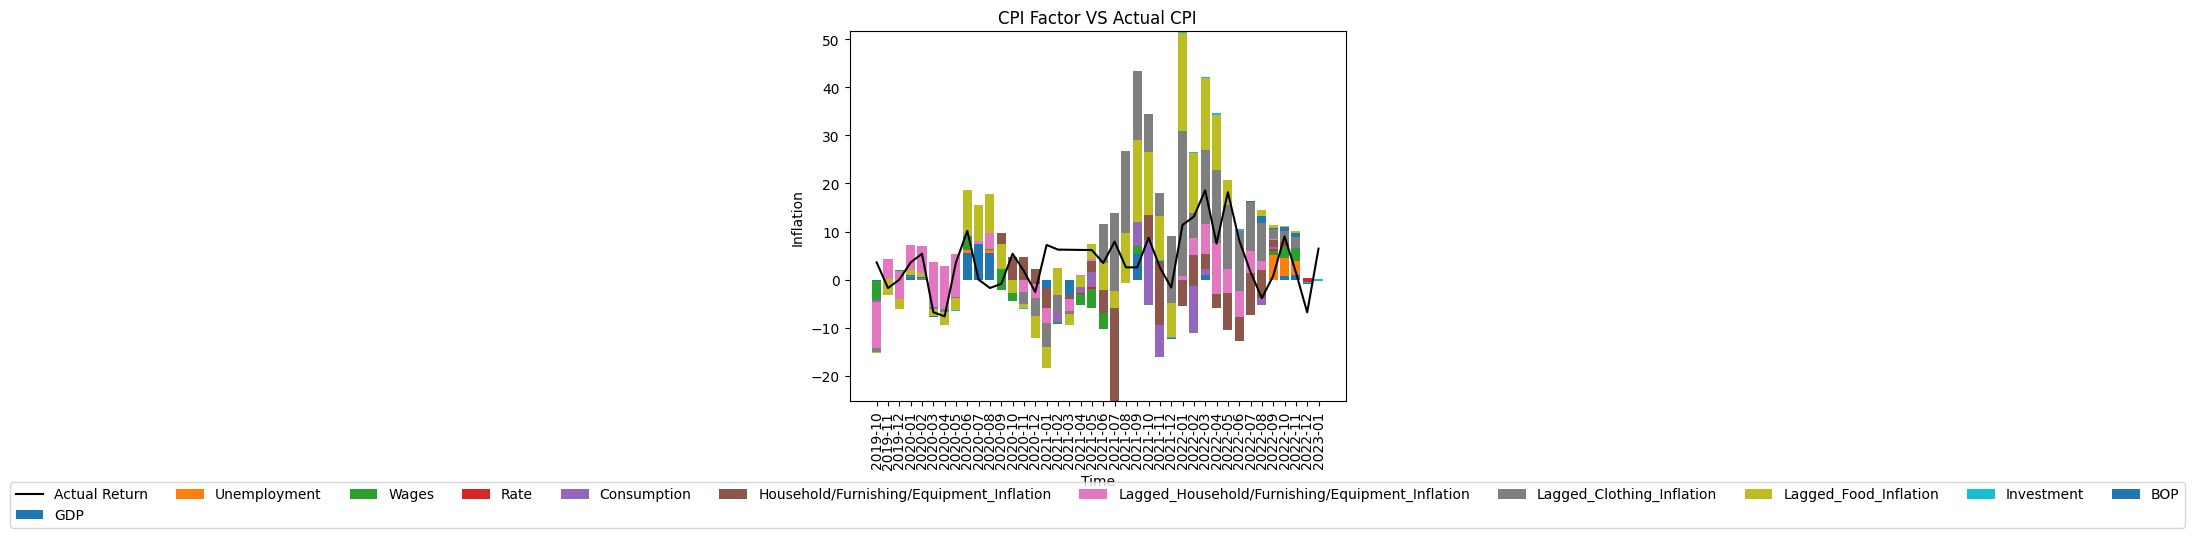

In [25]:
ten_factor_data=CoefLogger.tail(40)
num_rows = len(ten_factor_data)
import numpy as np
import matplotlib.pyplot as plt

print("Number of rows:", num_rows)
time=num_rows

categories = ['GDP', 'Unemployment', 'Wages', 'Rate','Consumption','Household/Furnishing/Equipment_Inflation','Lagged_Household/Furnishing/Equipment_Inflation','Lagged_Clothing_Inflation','Lagged_Food_Inflation','Investment','BOP',]
time_periods = ten_factor_data.index[:time].tolist()
data = np.array([ten_factor_data['GDP'].tolist()[:time],  # mkt
                 ten_factor_data['Unemployment'].tolist()[:time],   # smb'CPI ~ GDP + Unemployment + Wages + BOP + Rate + CS + II+HouseFurnEquip+LClothShoes+LFood'
                 ten_factor_data['Wages'].tolist()[:time],
                 ten_factor_data['Rate'].tolist()[:time],
                 ten_factor_data['CS'].tolist()[:time],   # cma
                 ten_factor_data['HouseFurnEquip'].tolist()[:time],
                 ten_factor_data['LHouseFurnEquip'].tolist()[:time],
                 ten_factor_data['LClothShoes'].tolist()[:time],
                 ten_factor_data['LFood'].tolist()[:time],
                 ten_factor_data['II'].tolist()[:time],
                 ten_factor_data['BOP'].tolist()[:time],
                 ])  

# Create stacked bar chart
fig, ax = plt.subplots()

# Plotting each category's bar
bottom = np.zeros(len(time_periods))
for i, category in enumerate(categories):
    ax.bar(time_periods, data[i], bottom=bottom, label=category)
    bottom += data[i]

# Customize the plot
ax.set_xlabel('Time')
ax.set_ylabel('Inflation')
ax.set_title('CPI Factor VS Actual CPI')
ax.legend()

# Calculate trend line
x = np.arange(len(time_periods))
y=ten_factor_data['CPI'].tolist()[:time]

# Plot the trend line
ax.plot(x, y, color='black', label='Actual Return')
ax.legend()

# Set the legend below the graph
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(categories))

# Set the x-axis tick labels to display horizontally
plt.xticks(rotation=90)
plt.xticks(fontsize=10)

#plt.ylim(-5, 5)
# Display the chart
plt.show()
